In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data=pd.read_csv('gold.csv')

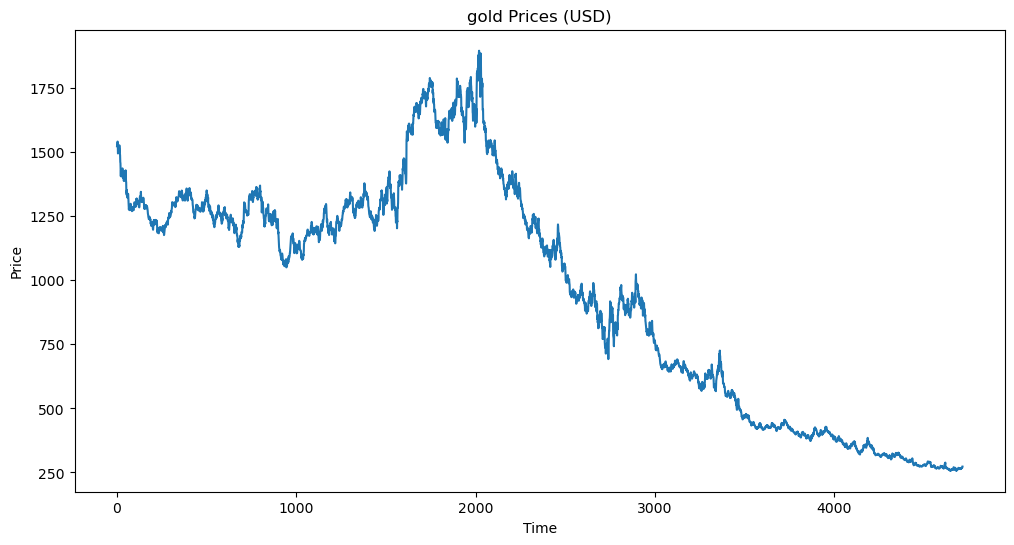

In [3]:
N = 1000
plt.rcParams['figure.figsize'] = [12, 6]
X = data['USD (AM)'][::-1].reset_index(drop=True)
plt.plot(X)
plt.title('gold Prices (USD)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Gold Prices ACF')

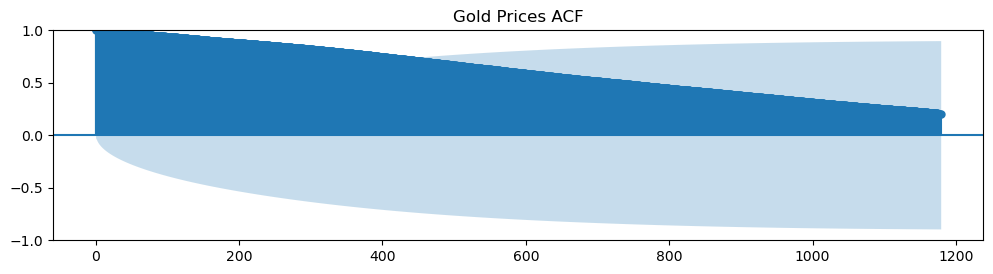

In [4]:
plt.subplot(2, 1, 1)
plot_acf(X, lags=int(len(X)/4), ax=plt.gca())
plt.title('Gold Prices ACF')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'gold Prices PACF')

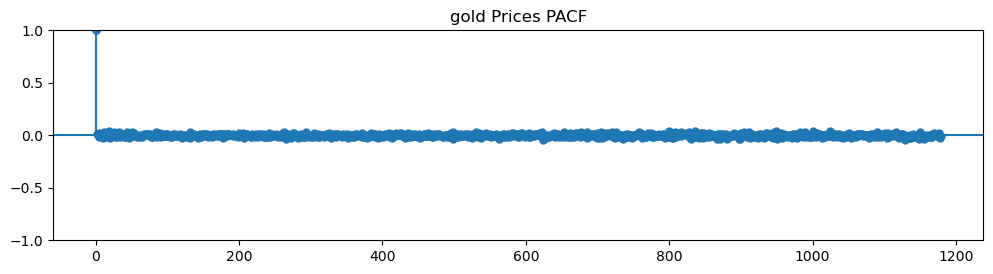

In [5]:
plt.subplot(2, 1, 2)
plot_pacf(X, lags=int(len(X)/4), ax=plt.gca())
plt.title('gold Prices PACF')

In [6]:
plt.tight_layout()
plt.show()
arma11_model = ARIMA(X, order=(1, 0, 1)).fit()
phi1_arma11 = arma11_model.params['ar.L1']
theta1_arma11 = arma11_model.params['ma.L1']

<Figure size 1200x600 with 0 Axes>

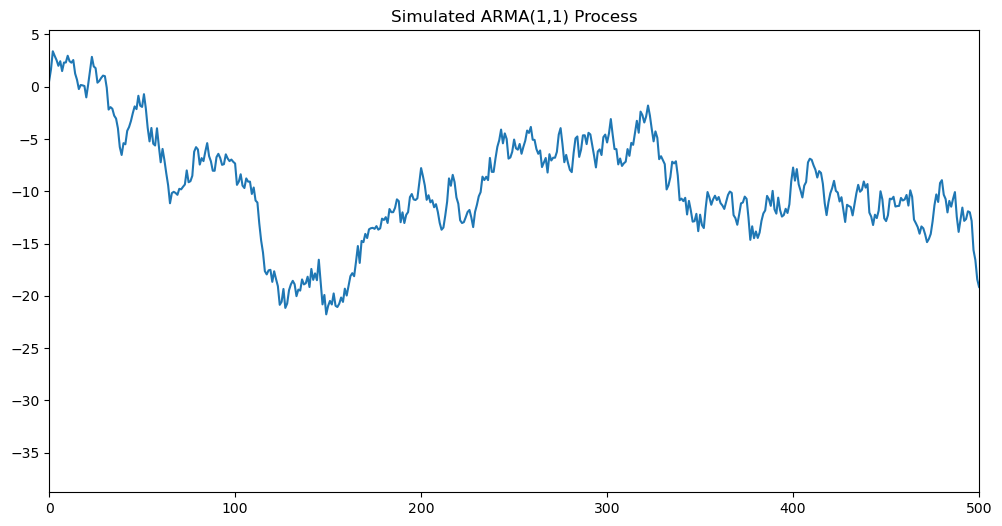

In [7]:
ar1 = np.array([1, -phi1_arma11])
ma1 = np.array([1, theta1_arma11])
ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=N)
plt.plot(ARMA_1)
plt.title('Simulated ARMA(1,1) Process')
plt.xlim([0, 500])
plt.show()

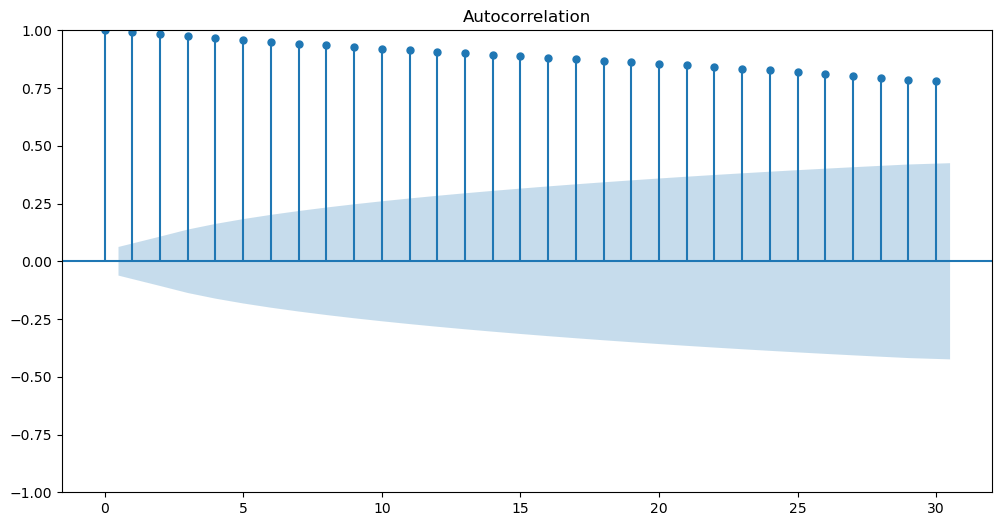

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


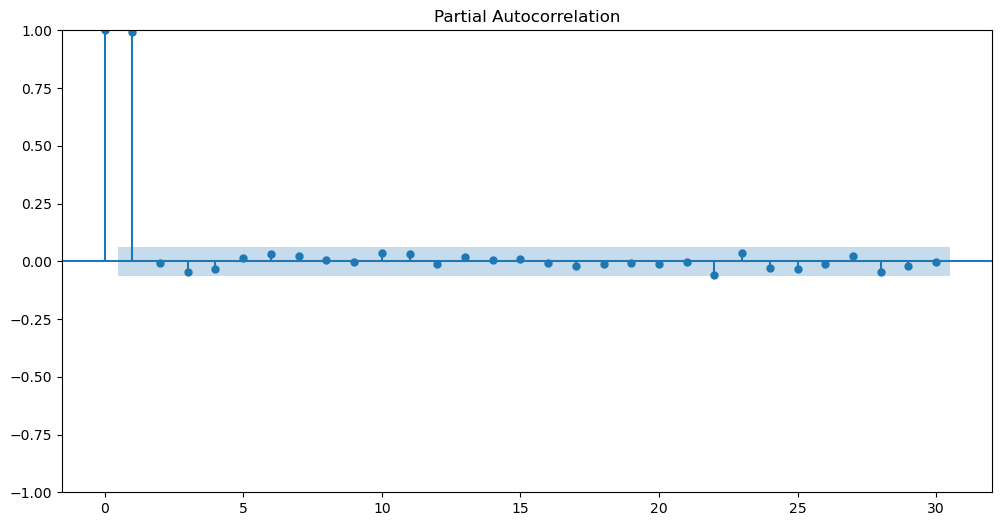

In [8]:
plot_acf(ARMA_1)
plt.show()
plot_pacf(ARMA_1)
plt.show()

In [9]:
arma22_model = ARIMA(X, order=(2, 0, 2)).fit()
phi1_arma22 = arma22_model.params['ar.L1']
phi2_arma22 = arma22_model.params['ar.L2']
theta1_arma22 = arma22_model.params['ma.L1']
theta2_arma22 = arma22_model.params['ma.L2']

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


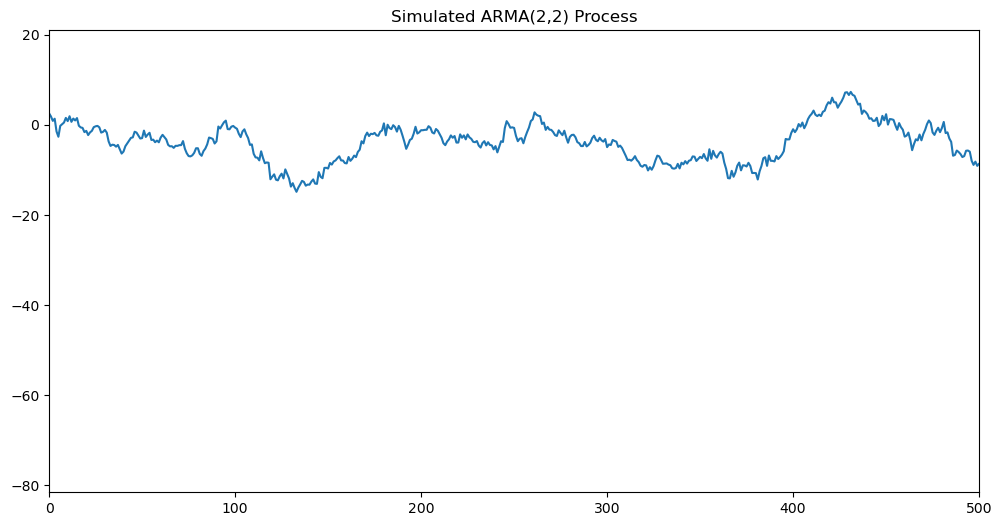

In [10]:
ar2 = np.array([1, -phi1_arma22, -phi2_arma22])  
ma2 = np.array([1, theta1_arma22, theta2_arma22])  
ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=N*10)
plt.plot(ARMA_2)
plt.title('Simulated ARMA(2,2) Process')
plt.xlim([0, 500])
plt.show()

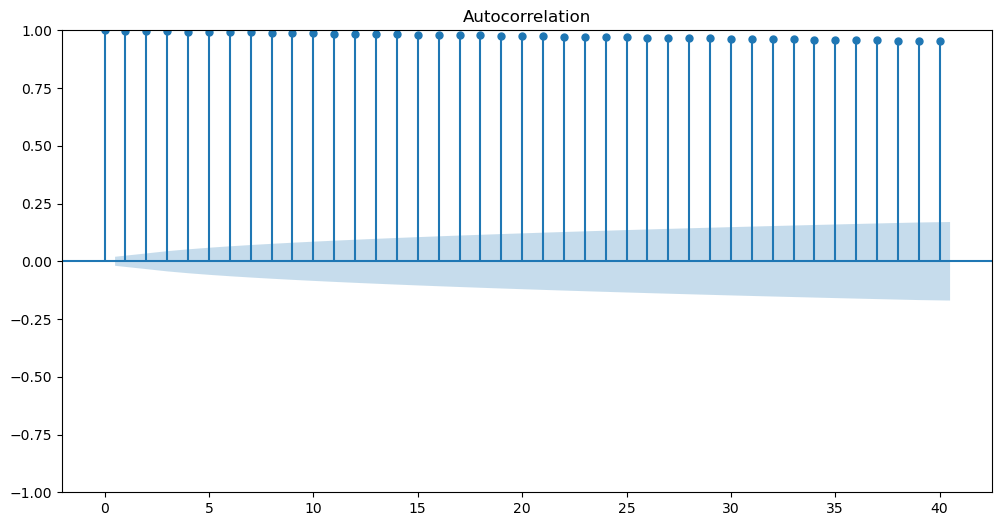

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


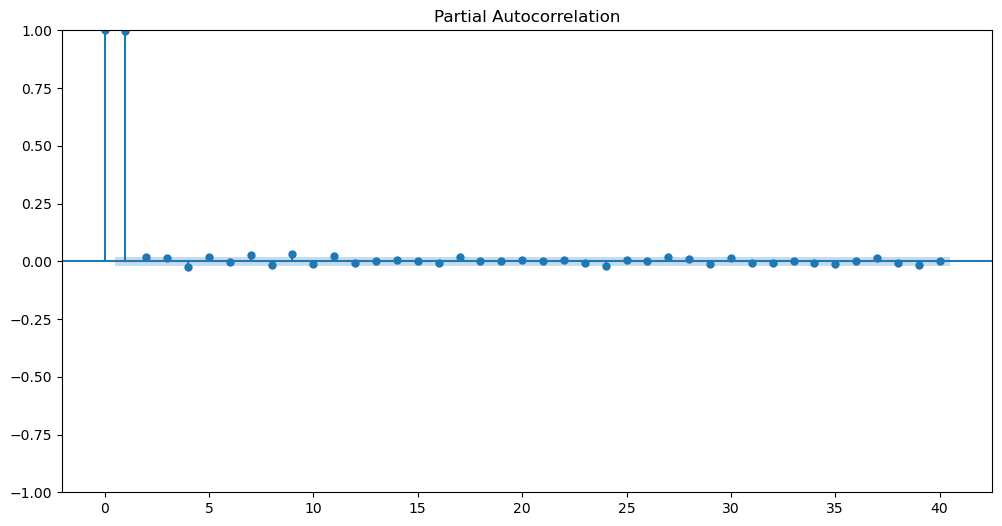

In [11]:
plot_acf(ARMA_2)
plt.show()
plot_pacf(ARMA_2)
plt.show()